[Notebook of task](https://github.com/DistributedSystemsGroup/Algorithmic-Machine-Learning/blob/master/Challenges/Plankton/plankton_challenge.ipynb)

# Useful websites and articles

### Libraries for Deep NNs
Most relevant
- [TensorFlow](https://www.tensorflow.org/)
- [Keras](https://keras.io/)
- [Theano](http://deeplearning.net/software/theano/)

Less relevant (mostly for GPU optimisation)
- [Caffe](http://caffe.berkeleyvision.org/)
- [Neon](https://www.intel.ai/neon-2-0-optimized-for-intel-architectures/)

In [20]:
%matplotlib inline
# For configuration and jupiter
import os
import sys
import re
import random
import matplotlib
import implicit
import warnings
# For data manipulation
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For prediction
from tqdm import tqdm
# import tensorflow as tf
# Unable to import TF...



import zipfile
from io import BytesIO
from PIL import Image

def extract_zip_to_memory(input_zip):
    '''
    This function extracts the images stored inside the given zip file.
    It stores the result in a python dictionary.
    
    input_zip (string): path to the zip file
    
    returns (dict): {filename (string): image_file (bytes)}
    '''
    input_zip=zipfile.ZipFile(input_zip)
    return {name: BytesIO(input_zip.read(name)) for name in input_zip.namelist() if name.endswith('.jpg')}


# img_files = extract_zip_to_memory("imgs.zip")

# Display an example image 
# Image.open(img_files['imgs/32738710.jpg'])

# Load the image as a numpy array:
# np_arr = np.array(Image.open(img_files['imgs/32738710.jpg']))

# Be aware that the dictionary will occupy roughly 2GB of computer memory!
# To free this memory again, run:
# del img_files
base = '/mnt/datasets/plankton/flowcam/'

# Nr of picture/rows = 243 611

In [6]:
image_filename = base + "imgs.zip"
img_files = extract_zip_to_memory(image_filename)

In [7]:
print(img_files['imgs/32738710.jpg'])

In [8]:
list(img_files.keys())[:5]

['imgs/32599711.jpg',
 'imgs/32584610.jpg',
 'imgs/32616991.jpg',
 'imgs/32670752.jpg',
 'imgs/32632598.jpg']

In [9]:
img_array = np.array(Image.open(img_files['imgs/32738710.jpg'])).shape

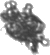

In [10]:
Image.open(img_files['imgs/32738710.jpg'])

In [4]:
nativeDF = pd.read_csv(base + 'features_native.csv.gz')
skimagDF = pd.read_csv(base + 'features_skimage.csv.gz')
labelsDF = pd.read_csv(base + 'meta.csv')

In [10]:
#print(nativeDF.isnull().sum().sort_values(ascending=False)[:10])
#print(skimagDF.isnull().sum().sort_values(ascending=False)[:6])
native_nan_cols = ['perimareaexc', 'feretareaexc', 'cdexc', 'skeleton_area',
                   'nb1_area', 'symetrieh_area', 'symetriev_area', 'convarea_area',
                  'nb2_area', 'nb3_area', ]
skimage_nan_cols = ['moments_normalized4', 'weighted_moments_normalized0', 
                    'moments_normalized1', 'moments_normalized0',
                   'weighted_moments_normalized1', 'weighted_moments_normalized4']

In [14]:
for col_name in native_nan_cols:
    nativeDF[col_name] = nativeDF[col_name].fillna(0)

for col_name in skimage_nan_cols:
    skimagDF[col_name] = skimagDF[col_name].fillna(0)

labelsDF['level1'] = labelsDF['level1'].fillna(0)
labelsDF['level2'] = labelsDF['level2'].fillna(0)

print(nativeDF.isnull().sum().any())
print(skimagDF.isnull().sum().any())
print(labelsDF.isnull().sum().any())

False
False
False


In [19]:
print('Nr. of unique level1 names')
print(labelsDF['level1'].nunique())
print('Nr. of unique level2 names')
print(labelsDF['level2'].nunique())
print('Nr. of unique names')
print(labelsDF['unique_name'].nunique())

Nr. of unique level1 names
57
Nr. of unique level2 names
40
Nr. of unique names
103


In [49]:
number_unique_names = labelsDF.groupby('unique_name', as_index=True)['id'].count()
number_unique_names.sort_values(inplace=True, ascending=False)

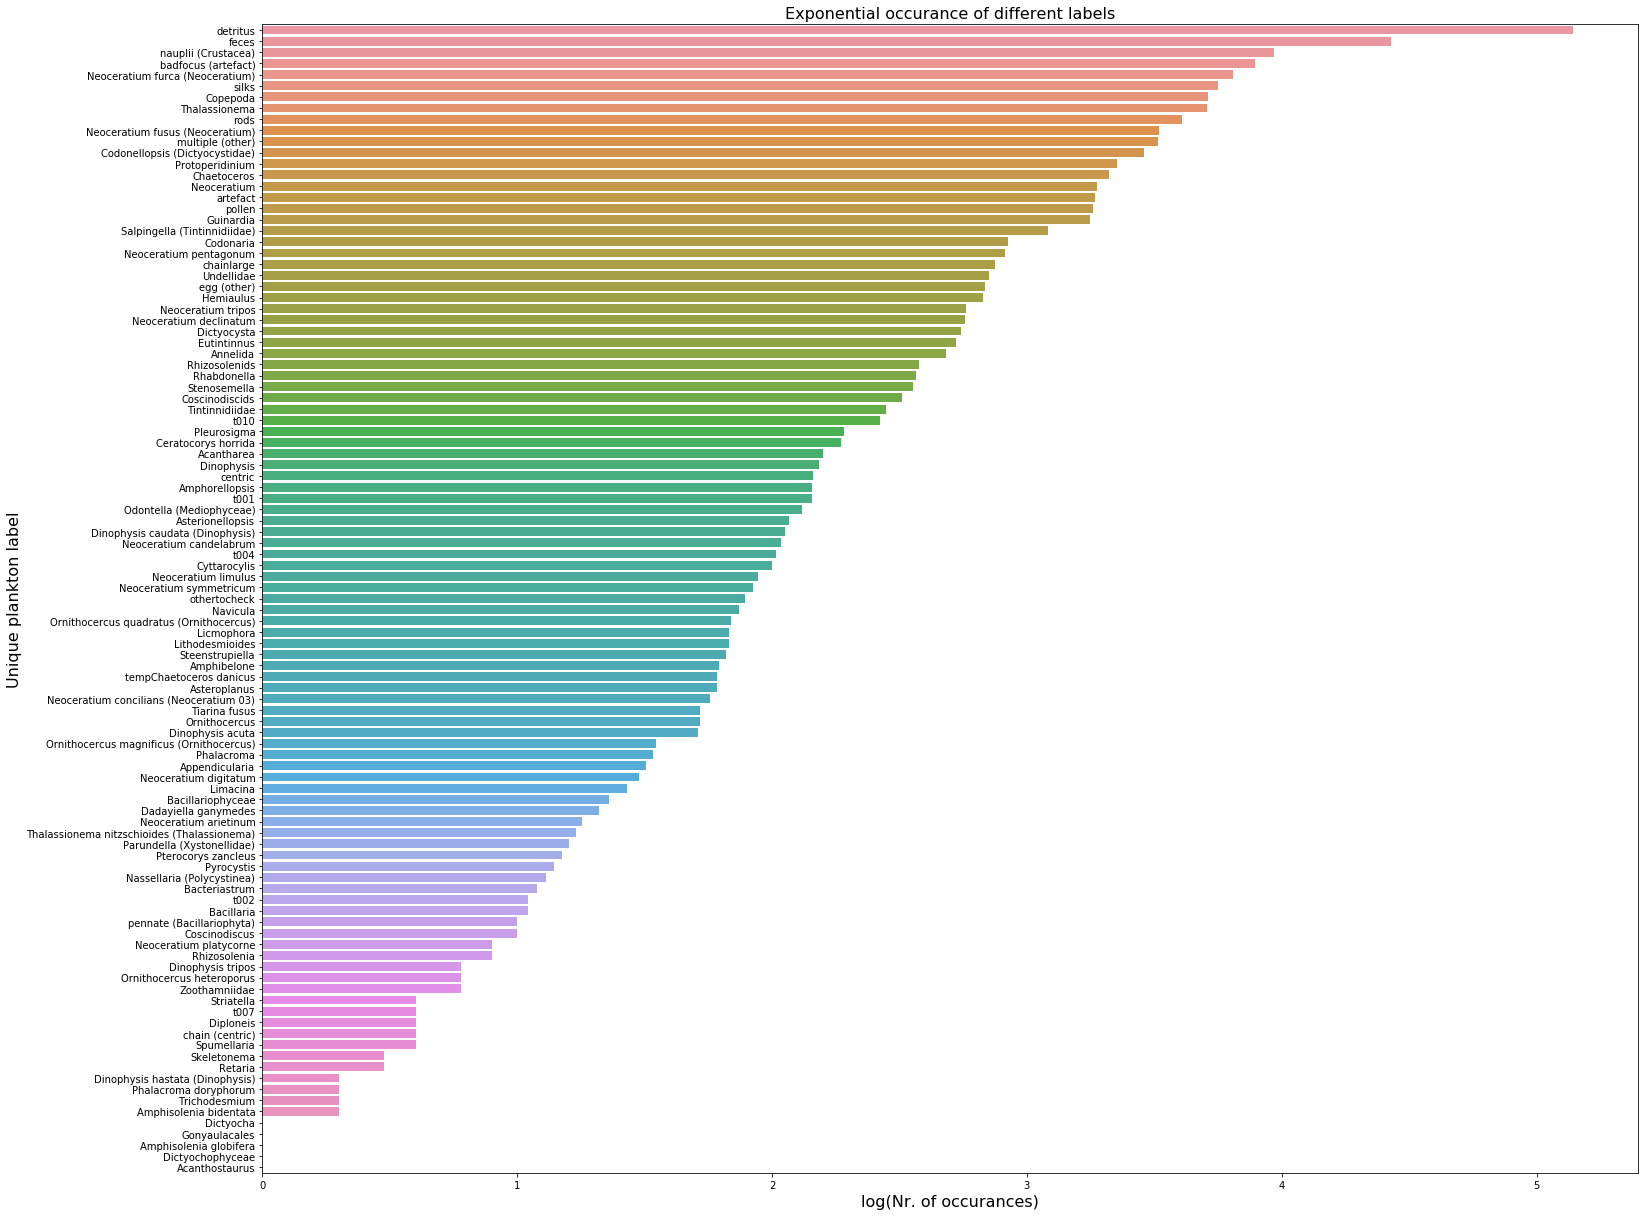

In [63]:
figure, ax = plt.subplots(figsize=(23,17))
ax = sns.barplot(y=number_unique_names.index, x=np.log10(number_unique_names.values))


plt.ylabel('Unique plankton label', fontsize= 16)
plt.xlabel('log(Nr. of occurances)', fontsize= 16)
plt.title('Exponential occurance of different labels', fontsize=16)
plt.tight_layout()